<a href="https://colab.research.google.com/github/wallik2/Hands-on-ML/blob/main/Chapter_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>Chapter 3: Classification</u>


We will work on MNIST(Modified National Institute of Standards and Technology database) which is about the handwritten digits image

- So what we are going to do is we will create the classification algorithm that can recognize the handwritten digits 

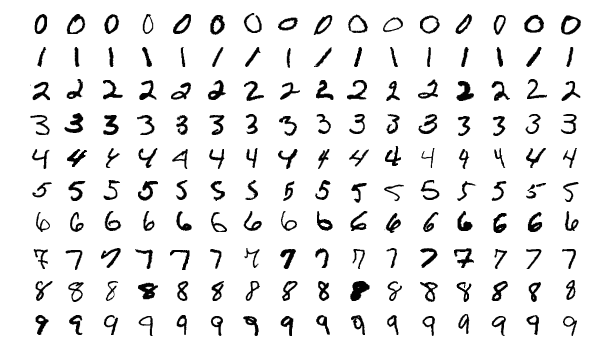

# Part 1 : Prepare the Dataset

In [ ]:
#Luckily, sklearn already provides the dataset of MNIST
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

The keys in mnist dataset are sort of Dictionary, and here's 3 notable keys to use
- DESCR key => describing the dataset
- data key (X) =>  an array with one row per instance & one column per feature
- target key (y) => an array with Labels 

In [ ]:
#Now making Explanatory variable & Label

X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape

# 784 features

(70000, 784)

In [ ]:
y.shape

# 1 label

(70000,)

## **Interpretation**

Explanatory var: Containing 70000 images, and Each Image has 784 features

- The reason it has 784 features is because each image contain 28*28 pixels, each feature simply represent one's pixel intensity, from 0(white) to black(255) !

So, next we will visualize the first instance which represent a handwritten digit image: in order to do that, we will use matplotlib to plot 28*28 arrays (firstly, we need to reshape the 1*784 arrays to 28*28 arrays)


## Features

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

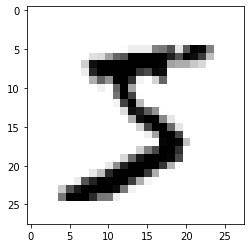

In [ ]:
plt.imshow(some_digit_image, cmap="binary")                    #an image from a 2-dimensional numpy array. using color map 
plt.axis("on")
plt.show()

## Label

In [ ]:
y[0]

'5'

wait!? Is the label string, so we need to change string to integer first, since Mนst ML algorith algorithms expect numbers

In [ ]:
import numpy as np

In [ ]:
y = y.astype(np.uint8)

In [ ]:
y[0]     

#now, The label is an integer

5

- Now we have done discovering our Dataset, next we will split our training set and Test set!
- Remember that the dataset is already shuffled when it come from Sklearn, so that help you a lot!, also guarantee that all cross-validation folds will be similar 

- In this scenario, we pick the first 60000 images as a training set, and 10000 images as a test set!

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]



---


# Part 2: Create the problem

So, you must ask yourself that what you are going to do, and simplify the problem.
in this case, we decided to do a Binary classifier which is about **5-Detector** which capable to detect number 5, the only 2 outcomes is <u>5 and not-5</u>

Spoiled: We will do 4 Classifiers:



2.1)   Binary Classifier <br>
2.2)   Multiclass Classifier <br>
2.3)   Multilabel Classifier <br>
2.4)   Multioutput Classifier


In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## 2.1) Binary classifier:  
We will pick <u>**Stochastic Gradient Descent Classifier**</u> as our algorithm, as it is good at handling a bunch of features and instances

a great explanation video: https://www.youtube.com/watch?v=vMh0zPT0tLI

- U may be confused that How Gradient Descent is different from Linear Regression right?
-  a great explanation: https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)                      #since it relies on randomness of picking an instance
sgd_clf.fit(X_train, y_train_5)   

#But the numver of X_train is not equal to y_train_5, How can it be fitted
#Well, It's a classifier, so it only want the label that contain the positive class only

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Now, we done created our SGD classifier. Now let's try to predict our first instance (that is image of 5) using our alg.,

In [ ]:
sgd_clf.predict([some_digit])                        
#Our algorithm predicted first image correct!!      

array([ True])



---


# Part 3: Measure the performance
- We pick Cross Validation to be out test (split the training set into a smaller training set and validation set)

- There are 2 ways to evaluate the performances

1. Measuring Accuracy using Cross Validation
2. Confusion Matrix (Prefered for classification!!)







# 3.1: Measuring Accuracy using Cross Validation 

### Version 1) Do Cross Validation Manually
- Just to show how cross_val_score of sklearn works (Roughly similar)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

In [ ]:
skfolds = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

In [ ]:
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)                                         #Basically, Just a copy version that keep the same parameter as sgd_clf
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))                      

  #It gives us scores three time, because it evaluated the test set at each 3 folds respectively

0.9669
0.91625
0.96785


- As you can see once we created the new copy of sgd_clf (and what make it special is it still keeps the same parameter of this estimator which random_state=42).

- Then we just use it to train with data X_train and then predict to X_test (which got splitted using 3-fold cross validation)

- Now, we evaluate the performance of the model, by counting the number of correct predictions and the outputs the ratio of correct predictions.

- The result is in satisfactory level: <br>
Correct prediction 96.69%, 91.625%, 96.785% respectively.

### Version 2) Do Cross Validation using Sklearn

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])



---


- Wow! Above 96% accuracy  (Ratio of correct predictions) on all cross-validation folds. 

- But! Are u sure that Accuracy is a good evaluation for this classifier! Now, Let take's a look.
- Suppose we create new dumb classifier that predicts every image as Not-5 classifier.


---



In [ ]:
from sklearn.base import BaseEstimator  

In [ ]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self

  def predict(self,X):
    return np.zeros((len(X), 1), dtype=bool)           #This create the estimator that predict every image as Not-5 Classifier(False) (without seeing the trainig data, How dumb haha!)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

- That's right! Even a dumb classifier can even have a great accuracy. This is simply because the amount of 5s image is 10%, and the rest is 90%. 
- So, Accuracy is not a good evaluation for classifier


- So, we are going to introduce a better way to evaluate the classifier which called Confusion Matrix!

# 3.2:) Confusion Matrix (Recommended!)

- So, Instead of let directly predict and evaluate the cross validation score at the same time, we now changed to obtain the prediction first, then using Confusion Matrix to evaluate


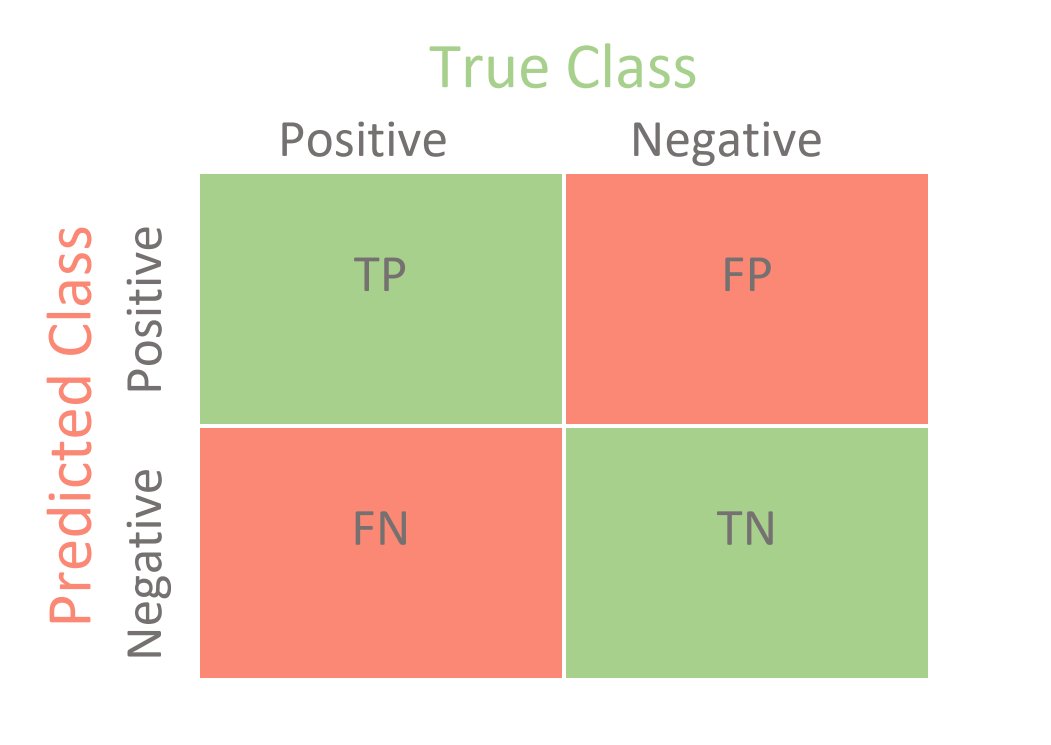

Noted: There are 2 classes: 1) Positive class, 2)Negative class
and, the sub-class are TP (True Positive), TN (True Negative), FP(False Positive), FN(False Negative) --> The Higher TP and FN is, the more accuracy the model predicts 

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# The predicted result by Stochastic Gradient descent

In [ ]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

Now, Let's welcome our Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

### <u>Result:</u> A great number of TP and FN is actually high
- TP (True Positive) = 53892, this mean that this model predicts the 5s image as True
- FN (False Negative) = 3530, this mean that, the model predicts the non-5s image as False

- The remaining TN and FP are 687 & 1891 respectively, which are wrong classified as 5s and non-5s (The more it has, the worse accuracy is)



---

You may want to see a perfect classfier.
- which would have only TP & FN, and no TN and FP
Let's pretend we got the perfect classifier (completely 100% overfitted)


In [ ]:
y_train_perfect_predictions = y_train_5 

In [ ]:
confusion_matrix(y_train_5 ,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# <u>Interpretation of Result</u>: 
- You can't guarantee the great accuracy TP and FN with just your bare eye. So, for a better precised evaluation, we have 2 concise metrics to evaluate!


1.   <b>Precision</b>: The accurary of the positive prediction

2.   <b>Recall</b>: Ratio of Correct positive prediction & All Correct prediciton

3. <b>Accurary</b>: which we have proofed yet that it is worst in classication (TP+FN)/(TP+TN+FP+FN), so we will skip

4. <b> F1 Score (Harmonic mean): The combination of Precision and Recall (Recommended!)

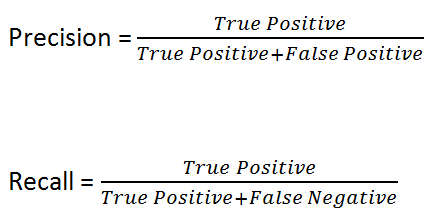


### 1) Precision , 2) Recall

- Here's such a great visualization

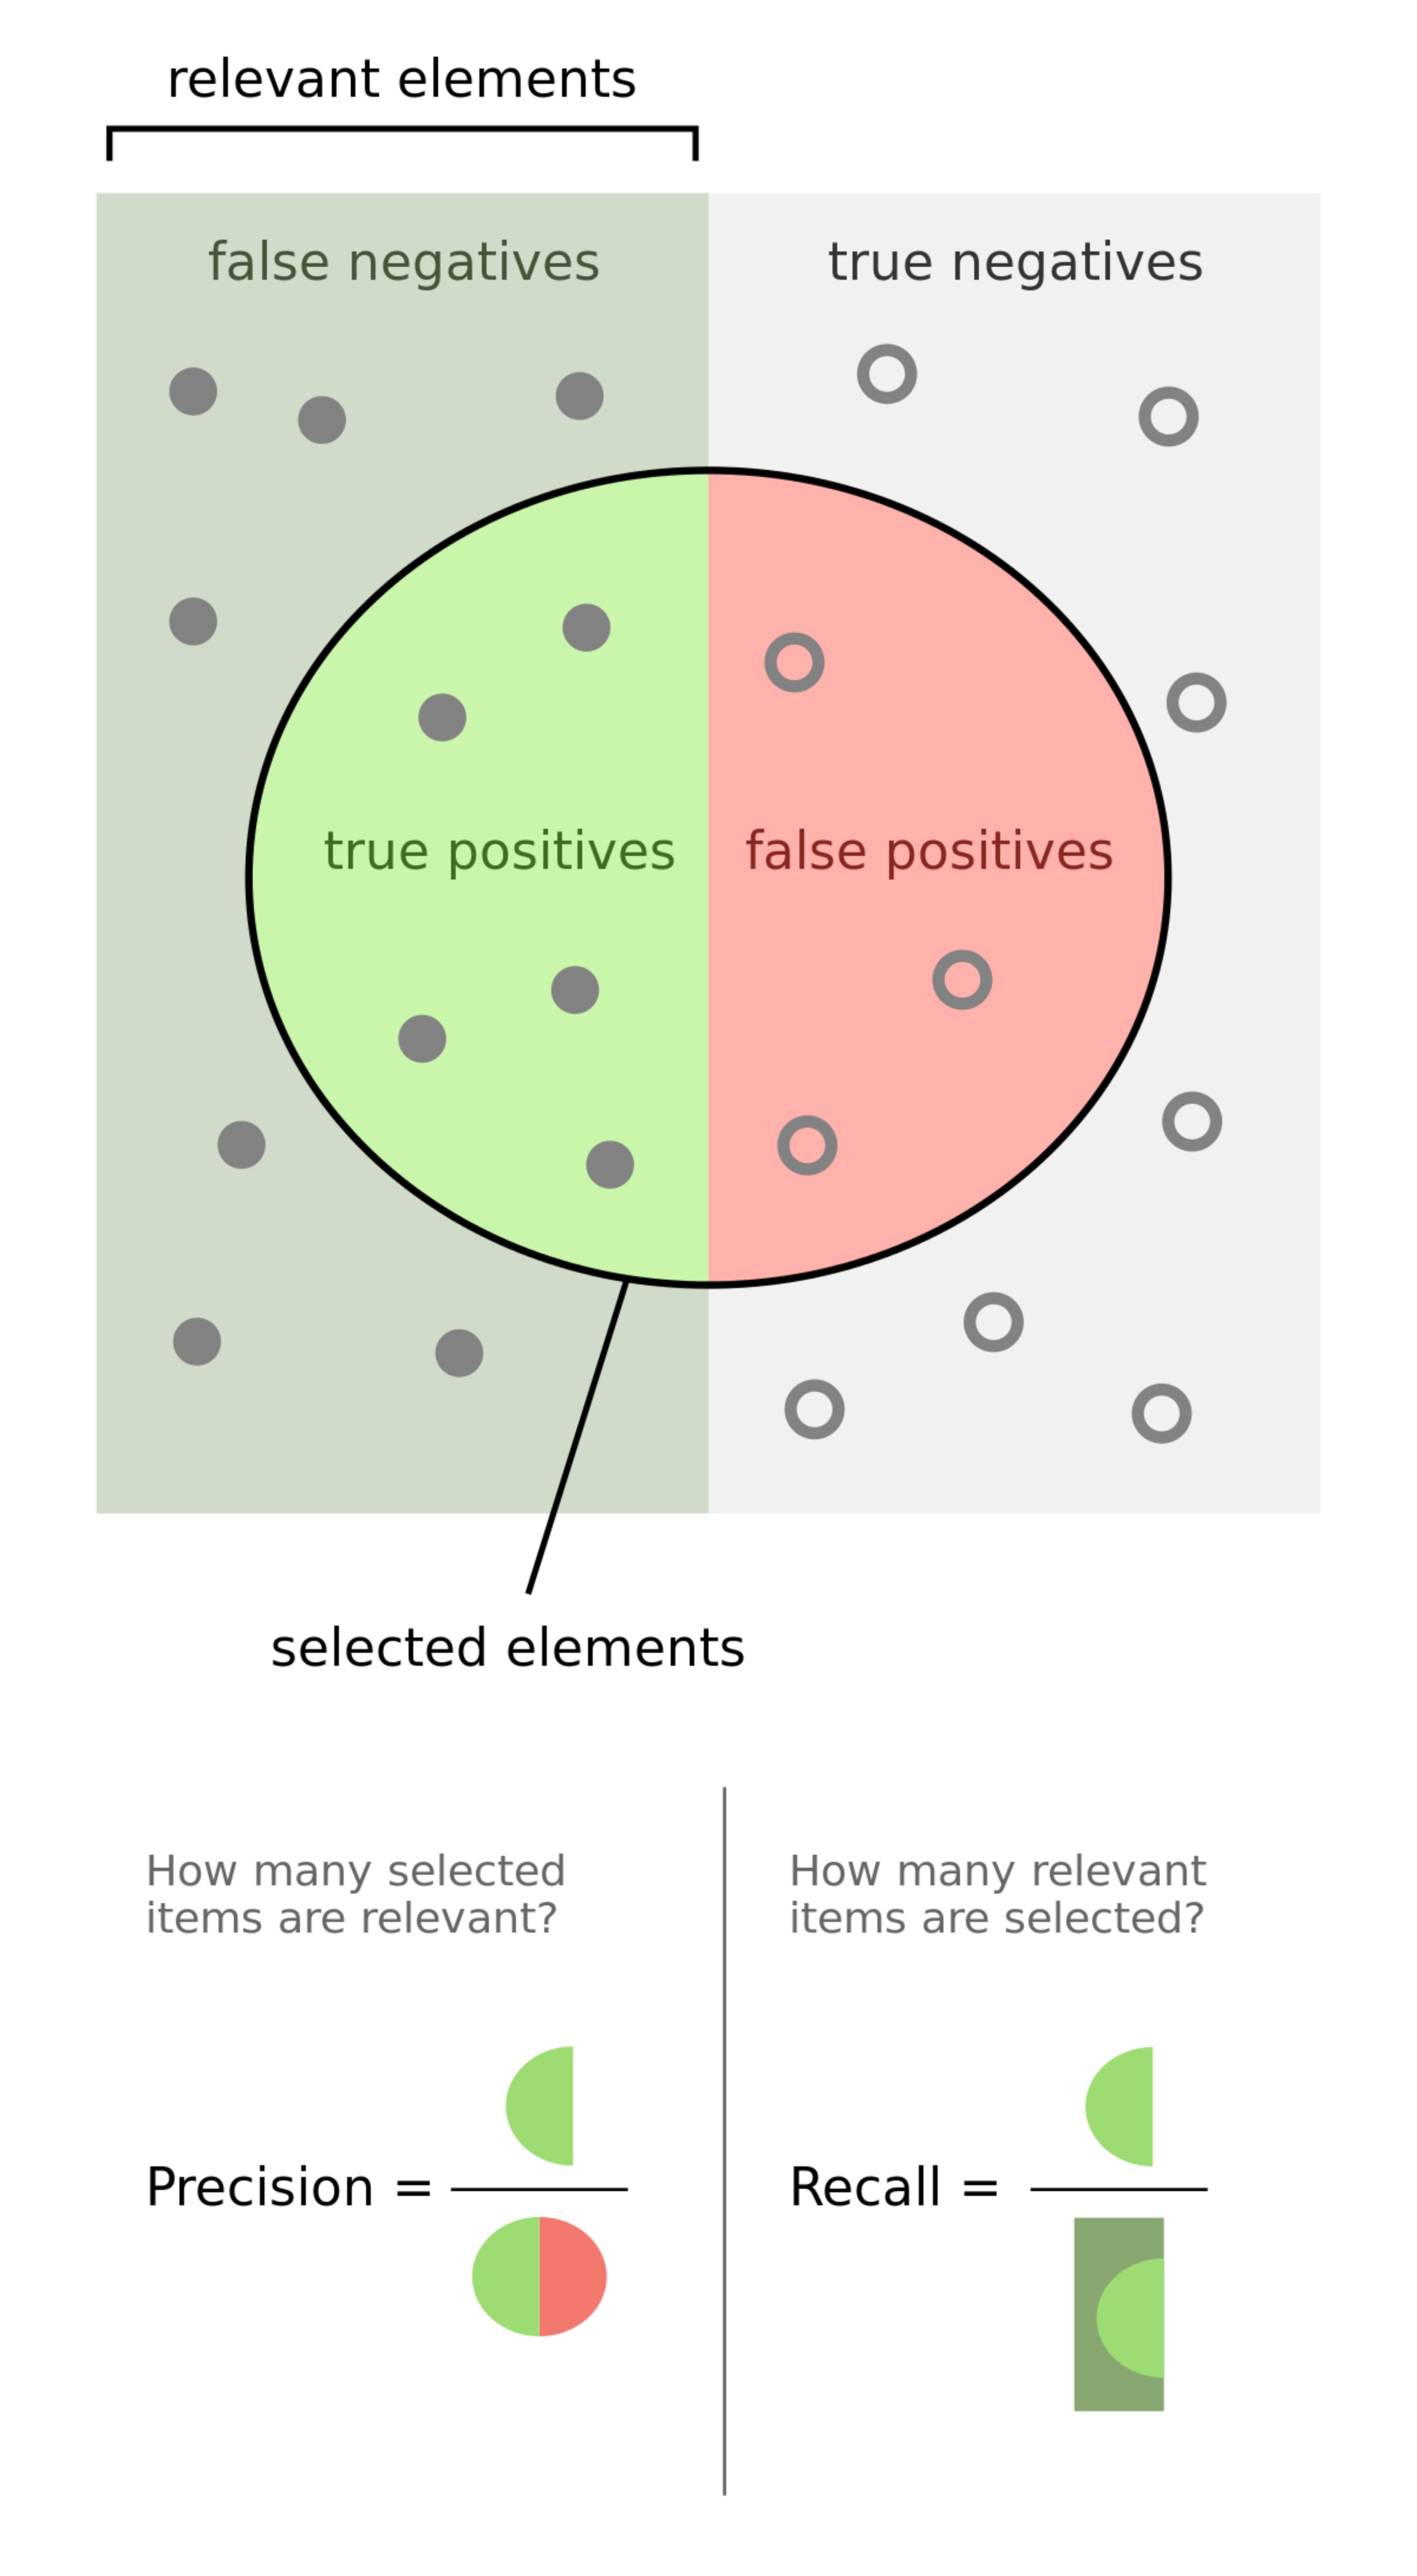


Luckily, Sklearn has provide these 2 metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5, y_train_pred) 
#53892/(53892+687)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)
#53892/(53892+3530)

0.6511713705958311

#### Results:

- Now, It is not looked shiny as you seen before, when it claims an image represents a 5 , it is correct only 83.7%. 
- While it only detects 75.6% of the 5s

### 4) Harmonic Mean (F1 score)

- Now Let me introduce the new metric which is the combination of precision and recall. which called HARMONIC MEAN (F1)
- This metric helps treating Precision and Recall equally, so you don't have to choose between these 2 metrics specifically.

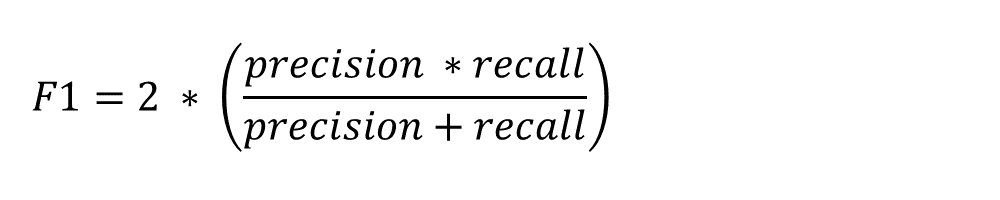

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846



---


## <u>When to pick Precision or Recall specifically</u>?

This is totally depends on your situation: some might want 
1. High precision and Low recall
- May prefer this when you are training a classifier tp detect videos that are safe for kids. you would prefer to reject many good videos (low recall), and keep only the safe ones (hish precision); (In such this case, you may want to add a human pipeline to check the classifier's video selection)

 <br>

2. Low precision and High recall
- May prefer using this to detect the shoplifters in surveillance image, so almost all shoplifters will get caught), It is probability fine when the classifier has 30% precision, and 99% recall (จับผิด ดีกว่า ไม่ได้จับคนขโมย)

(In such this case, you may hire the security guards to check the customer that got caught by the detection of the classifier)

---



## <u>Precision/Recall Trade-Off</u>



I think you have seen that 
- when the precision is increasing, it causes the recall to be decreasing also. 
- when the precision is decreasing, it causes the recall to be increasing also. 

-> Here's an axample of Precision & Recall Trade-off

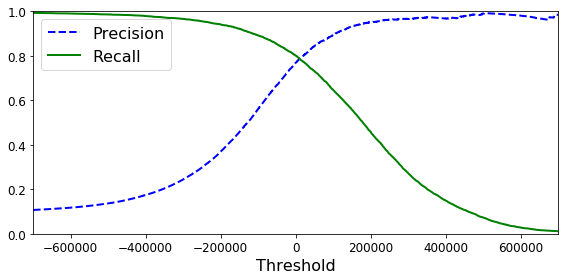

Sadly, Scikit-Learn doesn't let you set the threshold directly, but it gives us <i>decision scores</i> instead, using decision_function to obtain that scores.
- (The higher decision score is, the higher threshold is , the higher precision is, the lower recall is)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])

y_scores     #The score of the first image is 2164.22

array([2164.22030239])

In [ ]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

#We clssify the first image as Positive class

array([ True])

### <u>Interpretation</u>
- This means that the threshold is higher than 0 (where the precision equals to the Recall), this means the precision score is higher than the recall score.

In [ ]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

#Ww classify the first image as Negative class (which is True Negative)

array([False])

- The result shows that the threshold is lower than 8000
- However we can still conclude that the precision score is higher than the Recall scores



---


### <u>Problem</u> : which threshold will you decide to use? <br>

<u>Step 1</u>: so we decided to use cross_val_predict to obtain the predicted result, but instead of getting the predicted result, we will obtain decision scores instead

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

#The predicted result using stochastic gradient descent, and set decision_function to return the decision scores, instead of the predicted result

<u>Step 2</u>: Once you got the decision score, then you can apply these scores to compute precision and recall for all possible thresholds (scores) using <i>precision_recall_curve()</i>

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

<u>Step 3</u>: Select the best threshold value by looking at the plot
- There are 3 ways to plot


1.   Precision and Recall versus Threshold
2.   Precision versus Recall
3.   ROC Curve (False Positive Rate versus True Positive Rate (recall))

- In this section, We will try every of 3 ways to analyze and select the best threshold
---




<u>Step 3.1) Precision and Recall versus Threshold</u>

Now, let use Matplot lib to plot precision and recall as functions of the threshold values or the decision scores 

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

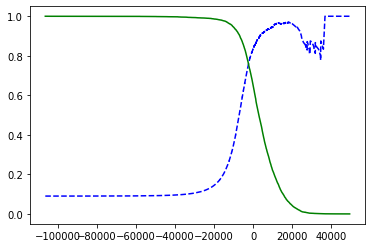

In [ ]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

plt.show()

Surprisingly, The precision curve is bumpier than the recall curve:
- This means that the precision curve will not always be smooth, since the precision may get lower, Look at the figure 3.3 in page 94 

- This proof that The precision and Recall curve will not always go smooth!! (Recall is still have some bumps, but not that much)



---

<u>Step 3.2) Precision versus Recall</u>




Another <u>Step 3</u> to select a good precision and recall tradeoff is to plot precision directly against recall 

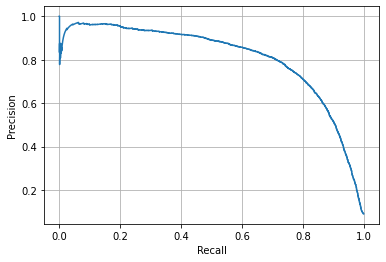

In [ ]:
plt.plot(recalls[:-1],precisions[:-1])

plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

#### Interpretation:
- Some notable signal is when the recall is more than 0.8, the precision starts to fall sharply, so you might decide to pick the recall that is less than 0.8, so you might decide to select Recall around 0.6 
- However, It depends on your project, as I told many time, your classifier might need to have high accuracy and low recall

#### Decision:
- Suppose you decide to aim for 90% precision. You look up the first plot (show relation of threshold and recall, and threshold and precision), and you found out that you need to use a threshold about 8000 to obtain 90% accuracy

- Using *np.argmax()* will give you the lowest threshold that give you at least 90% precision (stand for Argument max)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)        #y_score is the current threshold value of our model which is 2164.22030239
                                                              #If an image score is lower than threshold then it is in negative class (False), while another image score is higher than threshold then it is in positive class (True)
y_train_pred_90

#The output show us that the first image is classified as Negative Class which is NOT-5s, and some image that get True is Positive class which classified as 5s 

array([False, False, False, ...,  True, False, False])

Now, Let look our score, Precision score and Recall score for this new prediction

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

Great, Now you have a 90% precision classifier! As you can see it's fairly easy to get a high precision classifier, but let's look at your Recall score, It is fairly low, which mean that your classifier might often get the False positive image (reject 5s image as positive class)


---



<u>Step 3.3) ROC Curve</u>
- Another common tool used with Binary clasifier is to use ROC curve
- It plots True positive rate against False positive rate (FPR = 1-TNR) instead of plot the Precision againsts the Recall
- It shows that the given threshold give what TPR and FPR

Note: TPR, In other word, we called 'Recall' (the higher recall, the higher 5s image got classified as Positive class)

In [ ]:
from sklearn.metrics import roc_curve

the threshold value is various (I think it is generally random thresholds, this is the better to select the best threshold value that give us the good TPR and FPR

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#y_scores : Decision scores of all image
#y_train_5 = the label result from the real training data

In [ ]:
thresholds

 #As you can see it randomly generated threshold value with come with the TPR and FPR
 #These are the sorted threshold that give Lowest Tpr to Highest Tpr (as you acn see the last threshold is -146348 which is extremely high recall, that why It gives the highest TPR)

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, label=label)
  plt.plot([0, 1],[0,1],'k--')         #Dashed diagonal
  
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.grid()

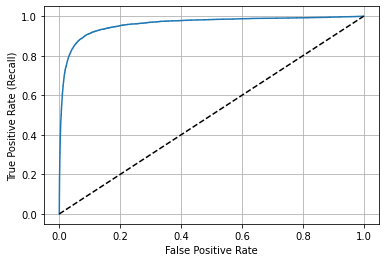

In [ ]:
plot_roc_curve(fpr,tpr)
plt.show()

#### Interpretation:
- The Higher Recall (TPR). The more False positive the classifier produces
- The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top left corner)

#### Performance Interpretation:
- You may wonder that what should have in a good classifier by looking in this graph; The answer is **Area under Curve**(AUC) score, the better classifier should have higher AUC (Maximum at 1, minimum at 0)
- The perfect classifier must have AUC=1

- Here's an example of AUC in ROC of the decent classifier

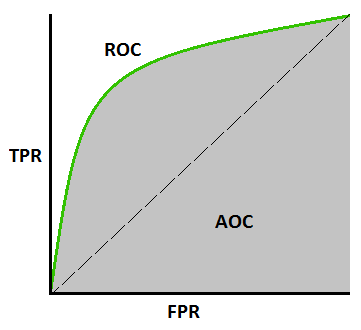



- This is an example of a lot of classifier (which sort from the perfect classifier to the worst classifier)





> Here's how can we find the value of AUC of this sgd classifier

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

Wow 0.96 is such an Impressive score, but It is a good idea to find a new classifier like **RandomForestClassifier** and compare the ROC AUC Score with the sgd classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Note: The RandomForestClassifier doesn't give the decision score on each image since It doesn't have a decision_function(), rather it gives us a predict_proba(), which returns an array containing a row per instance and a column per class,each containing the probability that the given instances belongs to the given class (e.g., 70% chance that the image represent a 5s)

In [ ]:
forest_clf= RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_probas_forest  

#The 1st column represents the chance of being negative class
#The 2nd column               -,,-             positive class

#The first instance: 11% chance that the image is NOT a 5s, and 89% chance is a 5s
#The second instance: 99% chance of not 5s image, 1% chance is a 5s

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

Since we know that the second column represents the chance of being positive class, so we will only pick that column!

In [ ]:
y_scores_forest = y_probas_forest[:,1]                #We only focus on the chance of being positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


> Now Let's compare the sgd classifier & Random Forest classifier in ROC curve



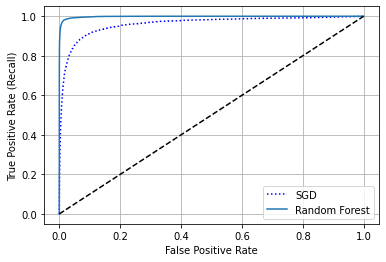

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

plt.legend(loc="lower right")
plt.show()

#### Interpretation:
- Wow, Random Forest looks much better than SGD, as it comes much closer to the top left corner, so let's see the ROC-AUC score




In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

#Wow 0.99 is such a significant better score than sgd classfier.

0.9983436731328145



---


The result shown, Why don't we use RandomForestClassifier instead of sgd
- Let see the precision and recall score ny using Precision versus Recall curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

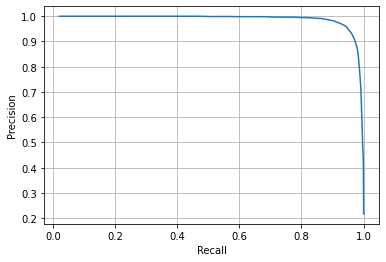

In [ ]:
plt.plot(recalls[:-1],precisions[:-1])

plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

Overall is significantly better than sgd PR curve, 
- suppose you want 99% precision classifier

In [ ]:
threshold_99_precision = thresholds[np.argmax(precisions >= 0.99)]

In [ ]:
y_train_pred_99 = (y_scores_forest >= threshold_99_precision)        
                                                            
y_train_pred_99

array([ True, False, False, ...,  True, False, False])

In [ ]:
print("The precision is "+str(precision_score(y_train_5, y_train_pred_99))+ "\nThe recall is "+str(recall_score(y_train_5,y_train_pred_99)))

The precision is 0.9905083315756169
The recall is 0.8662608374838591


## The Binary Classifier successfully created !!
- Congratulation, You finally get the Random Forest classifier which have 99.05% Accuracy and 86.62% Recall, That's insane!!!!!



---



### <u>Summary</u>:


1. If you raise threshold, then you increase the precision, but reduce the recall : rarely obtain False positive image, but often get True Negative (Classify 5s as negative class)

2. If you reduce threshold, then you reduce the precision, and increase the recall. : Often obtain False positive image (Classify 6s image as 5s image)



---



# 2.2) Multiclass Classification:


- After we've done the binary classifier which classify 5s or non-5s image.
- Now we are going to classify up to 10 class number (0,1,2,...,10) <br>


---


- Some Algorithm such as Logistic Regression , Random Forest, Naive Bayes classifier are capable to handle multiple classes natively.
-While some algoriths such as SGD classifier and Support vector machine classifier are strictly only being Binary classifier, but luckily there are a lot of strategies to perform multi-class classification with multiple binary classifiers, there are 2 main strategies whichi performed by Support vector machine (SVM) we are going to use today


1.   One-versus-the-rest (OvR) 
2.   One-versus-One (OvO)


---
### <u>2 Strategies by SVM to handle Multiclass classifier</u>

1. OvR :  We will create 10 classifiers which detect for each digit, so we are going to create 10 binary classifiers, one for each digits (a 0-detector, a 1-detector,...,a 9-detector), and each classifier will return the decision score, and those scores will be compared, and select the classifier that has the highest decision score. <br>

2. OvO : Train a binary classifier for every pair of digits (one to distinguish 0s and 1s, another to distinguish 0s and 2s, another to distinguish 0s and 3s,......,another to distinguish 9s and 10s), so since we have 10 classes, so the total numver of classifiers is 10*(10-1)/2 = 45 classifiers, and select for which class wins the most duels.<br>

> Used OvR when the training set is Large (faster) <br><br>
> Use OVO when the training set is small (faster)


---





Now, Let train the Multiclass classifier by using SVM 
- Note: The SVM will detect that we are trying to use a binary classfier alg. for multiclass-classification task, It will automatically run OvR or OvO, depending on the algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict ([some_digit])

#In this case, SVC will suddenly pick OvO strategy; which trained 45 binary classifiers, got their decision score for the image, and select the class that won the most duel
#It takes such a long time (maybe 45 times longer than a single binary classifier )

array([5], dtype=uint8)

- In this case, you can see that 5s is the champion along of all 45 battles

- So, let see the decision function score of class 5 in predicted this *some_digit*

In [ ]:
some_digit_score = svm_clf.decision_function([some_digit])

some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

- the above decision function means the scores of each digit from 0 to 9 respectively, as you can see the 6th digit(which is 5) has the highest score, This can be interpreted as 5 winning the most duel, and inferior to 5 is 3 (which the shape of 3 is quite similar to 5)

In [ ]:
np.argmax(some_digit_score)

#Another precise way to check which class has the highest score

5

In [ ]:
svm_clf.classes_

#Another way to check the classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)



---



Here's Another way to use force the SVM to use OvR

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

### Now let's Use SGD Classifier to do multiclass classification
- Note that ScikitLearn will automatically pick OvR strategy, since it trained 10 classifiers (instead of 45 binary classifiers) (ซึ่งผมก็ไม่รุทำไม 10 classifiers เขาเชคยังไง)

In [ ]:
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
#decision_function_shape 
some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

- Now, we can see that sgd_clf can predict 'some_digit' well, and you can see that most decision scores are tended to be negative except 3 and 5. This make sense because the handwritten number of 3 is similar to 5. However, the sgd is still able to capture some_digit as 5, since the decision score of 5 is slightly higher than 3 

- Now, let see the overall score by using Cross Validation Score to see the performance of sgd_clf

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

- The Overall score is above 85% which is impressive.
- BUT!! Remember we have a way to improve these scores by using Standardization to Training set (Since, Machine Learning Algorithms don't perform well when the input numerical attributes have very different scales)

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

- Even the score is in an impressive level, but in the real world project, you could possibly improve your model by do fine-tuning model
- In this case, assume we choose to improve our model by investigating the model by finding what types of error it made 

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
conf_mx =  confusion_matrix(y_train, y_train_pred)

You might never ever see the 10*10 matrix right? The concept is the same, as the main dingonal means correctly classified

In [ ]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

Which is quite impressive, as the most images are in the main diagonal, but it's a good idea to visualize the confusion matrix 

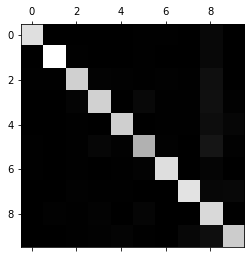

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

!!! Interpretation : The whiter it is, the higher value is.
The reason why the main diagonal is all white is because most image were truly classified, however, you might see the row of image 5 that it contain some grey element, which really mean image 5 is mostly classified as 8

- It might not be obvious to find the error by this confusion matrix, so we might consider to find the error rate of each image instead

- Now let see the error rate of each corresponding image! 

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Now, filling the zero into Main diagonal, because It is meaning less to see the error of the true classificated image

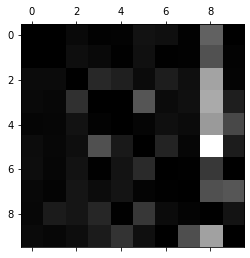

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now, You can see the kinds of errors the classifier makes. The most obvious error you might see is the column of image 8, this actually means most images were classified as 8, which make sense. 

So, In order to reduce the false 8s as much as  possible. You may need to do thse 4 things:

1. Gather more training data for digit that looks like 8s (So, they can learn to distinguish them from the real 8s. 
2. Engineer the new features that would help classifier, such as writing a n algorithm to count the number of closed loop (Ex. 8 has 2 closed loop, 6 has 2 closed loop, while 5 has no closed loop 
3. preprocessing the images such as using Sklearn-Image, Pillow, or OpenCV
to make some patterns such as closed loops, stand out more.

4. Analyzing individual errors: A good ways to gain insights on what your classifier is doing and WHY IT'S FAILING, but it wastes our time a lot to show all image




So, In this case we will try our choice 4) for image 3 and 5. To see the reason why the classifier made a lot of error on 3 & 5 

In [ ]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]         # y is 3s, and truly classify as 3s
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]         # y is 3s, but classify as 5s
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]             # y is 5s, but classify as 3s
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]  

In [ ]:
import matplotlib 

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

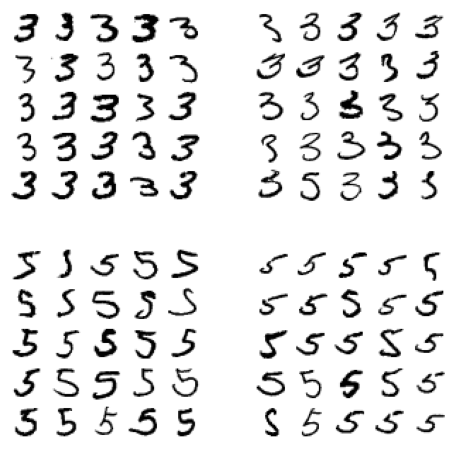

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)

1st row 1st column: True 3s <br>
1st row 2nd column: False 3s
<br><br>
So, as you can see, there is no doubt why the classifier distinguishs 3s as 5s. It really similar to 5, even our human eye cannot see these 3s as 3s LOL!!
<br><br>
Problem: You may wonder how SGD_Classifier does on these image: It assigns weights to each pixels per class, and when it sees a new image, it wisums up the weighted pixel intensities to get a score for each class, and since 3s and 5s differe only just a few oixel, so it can easily confuse the classifier
<br><br>
**Problem:** The main difference between 3s & 5s is the position of the small line that join the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left the calssifier might classify it as a 5s, and vice cersa. I.E. This classifier is quite sensitive to image shifting and rotation. 

<br><br>
**Solution**: So, what we could possibly fix this by preprocessing the images to ensure that they are well centered and not too rotated, This will probably help reduce other errors as well


## The Multiclass Classifier successfully created !!
- Congratulation, You finally get the Stochastic gradient descent which have 89% Accuracy. which is pretty good, however we still can increase the better performance of the model to be better.. to be honest !!!!



---

---





# Multilabel Classification

- what we did all earlier are actually classify as just one class right?
- but this time, the model will able to capture a lot of classes in the same pictures, E.g. recognize several people on the same picture
- More visualize better example would be ' the classifier has been trained to recognize three faces, Alice, Bob, and Charlie. Then what the classifier is shown a picture of Alice and Charlie, it should output [1,0,1] (which mean 'Alice yes', 'Bob No', 'Charlies Yes')
- However, we didn't go deep to recognize the face, but rather the following simple example <br>

**simply, Multilabel is just having more than 1 target attributes)**

**Scenario 1**:
 We are going to create a classifier which able to recognize the number more than 7, and odd or not odd at the same time!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Prepare the training set

y_train_large = (y_train >=7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
# Now, Let's train an algorithm 'KNeightborsClassifier'

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Let predict number 5

knn_clf.predict([some_digit])

#The prediction is correct, 5 is not >= 7, and 5 is ood!!

array([[False,  True]])

**Now, We've done created the model, now let's predict**<br>
- using 3-fold cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

**Let's evaluate the model**: <br>
- using F score (2/(1/precision+1/recall))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

# average = 'macro' --> the individual F score's wight of each target attributes will be equal

#If you prefer having more weight on correctly predicted score of y_train_odd more than y_train_large, then you might assign more weight on y_train_odd, so we could use average = 'weighted' instead

0.976410265560605



---






# Multioutput Classification

- simply Multilabel + Multiclass classification; having more than 1 target attribute, and each label can be multiclass (more than 2 possible values)

**Scenario1**: We are going to create a system that remove noise from the digit images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intesities (28*28), and each label can have multiple value (from 0 to 255)

Simply, We have 784 pixel labels, and each label has 256 classes

In [ ]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise


noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise


#Now we expect y_train as old X_train
y_train_mod = X_train
y_test_mod = X_test


some_index = 5500

ref : https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randint.html

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[some_index]])

plot_digit(clean_digit)

NameError: ignored

As you can see the input image is noisy image, and the output image is a clear image